# Heart Failure Prediction

by Luis Maverick L. Gabriel

## Context
Dataset Link: [heart-failure-prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Attribute Information
1. **Age:** age of the patient *[years]*
2. **Sex:** sex of the patient *[M: Male, F: Female]*
3. **ChestPainType:** chest pain type *[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]*
4. **RestingBP:** resting blood pressure *[mm Hg]*
5. **Cholesterol:** serum cholesterol *[mm/dl]*
6. **FastingBS:** fasting blood sugar *[1: if FastingBS > 120 mg/dl, 0: otherwise]*
7. **RestingECG:** resting electrocardiogram results *[Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]*
8. **MaxHR:** maximum heart rate achieved *[Numeric value between 60 and 202]*
9. **ExerciseAngina:** exercise-induced angina *[Y: Yes, N: No]*
10. **Oldpeak:** oldpeak = ST *[Numeric value measured in depression]*
11. **ST_Slope:** the slope of the peak exercise ST segment *[Up: upsloping, Flat: flat, Down: downsloping]*
12. **HeartDisease:** output class *[1: heart disease, 0: Normal]*


In [356]:
# Import necessary modules for visualizing our data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Data Analysis & Visualization

In [357]:
df = pd.read_csv("../data/heart.csv")
print(f'Dataframe Shape: {df.shape}')
df.head()

Dataframe Shape: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [358]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


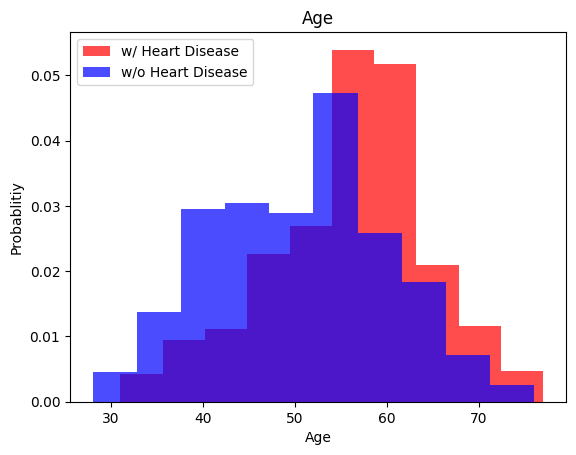

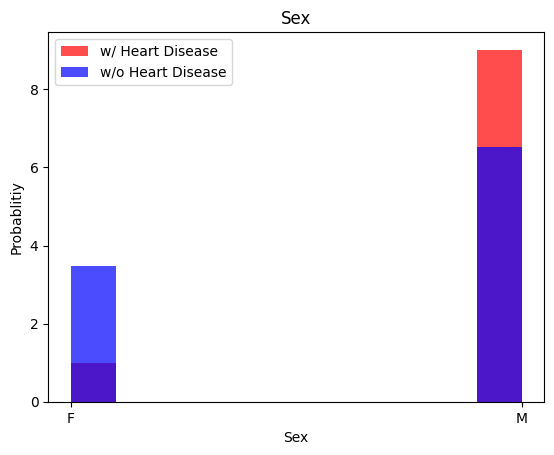

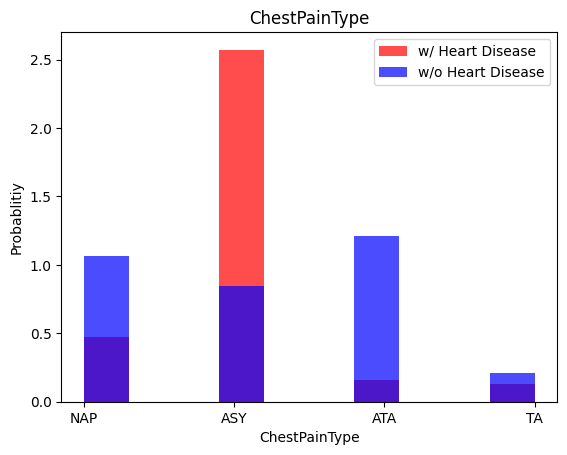

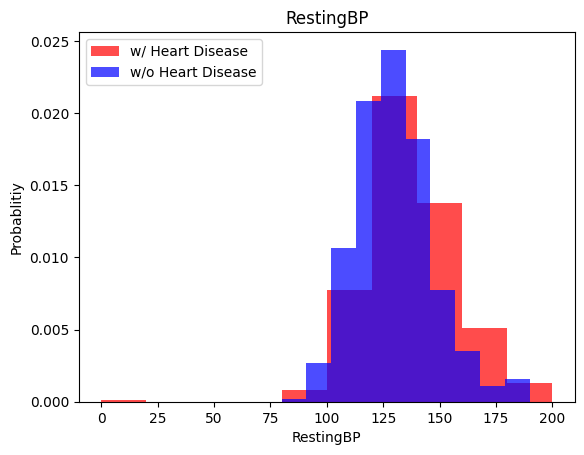

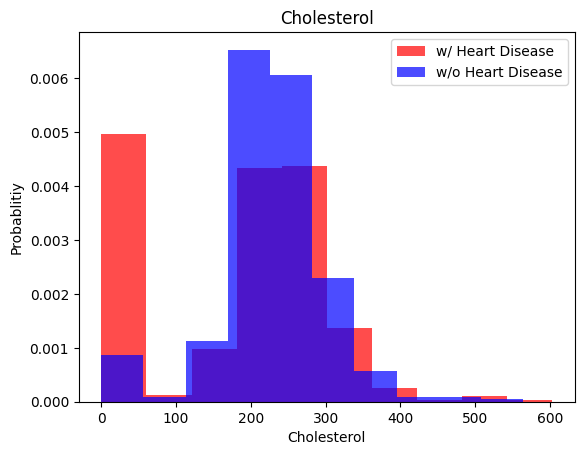

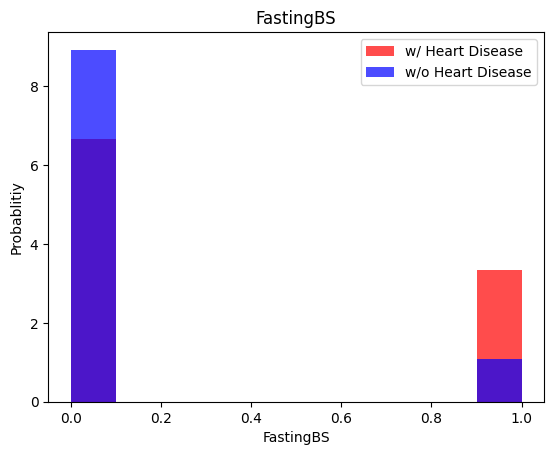

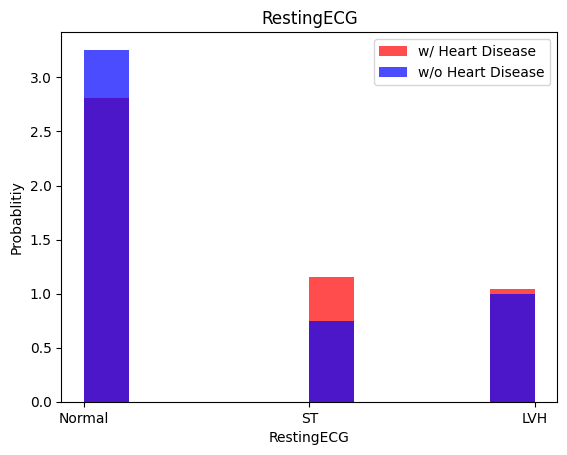

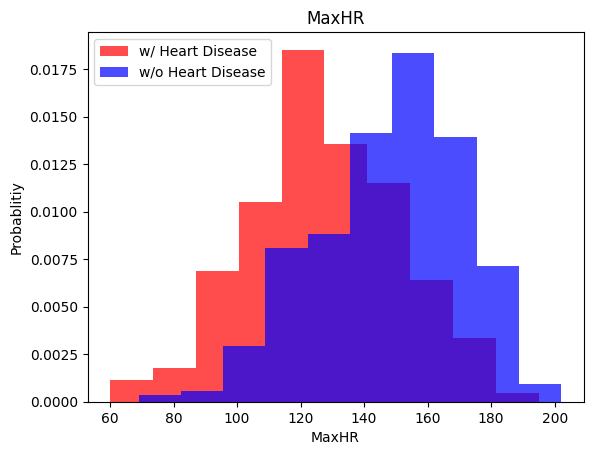

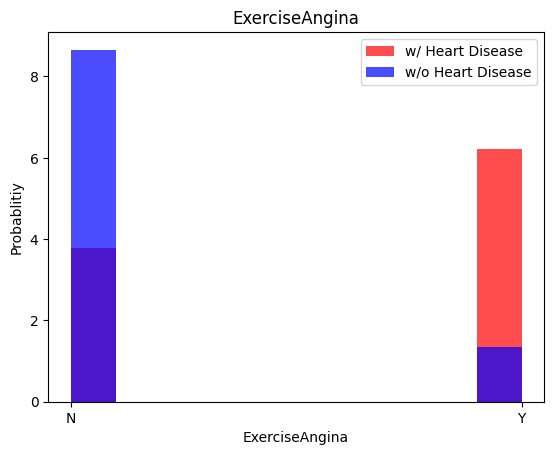

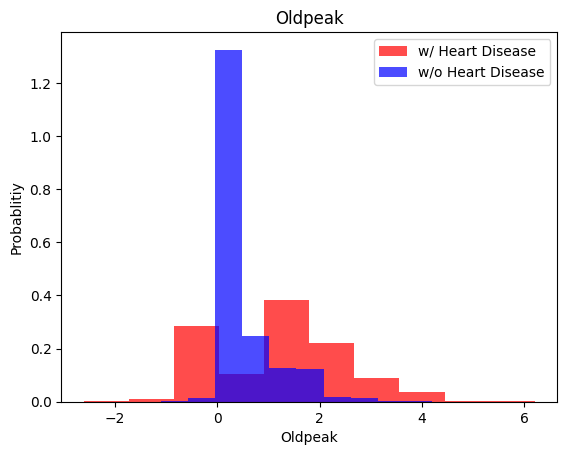

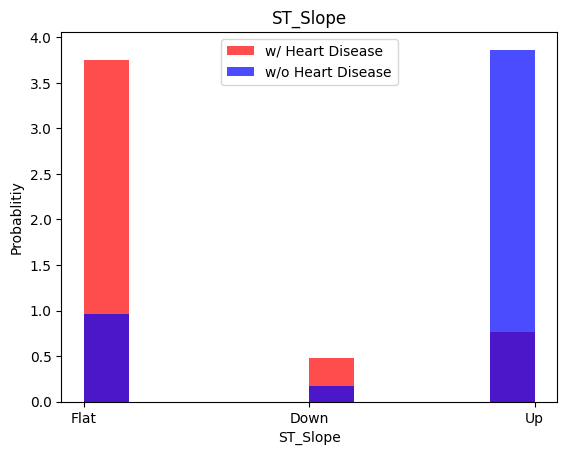

In [360]:
# Plot the Probability of y with respect to X using a histogram
for label in df.columns[:-1]:
    plt.hist(df.loc[df['HeartDisease'] == 1][label], color='red', label='w/ Heart Disease', alpha=0.7, density=True)
    plt.hist(df.loc[df['HeartDisease'] == 0][label], color='blue', label='w/o Heart Disease', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probablitiy')
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

## Data Cleaning & Feature Extraction

In [361]:
# Extract Features that are categorical
cat_columns = df.select_dtypes(include=object).columns.to_list()
cat_columns

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [362]:
# Uses One-hot encoding to extract categorical data types and turn them into binary vectors
df_dummies = pd.get_dummies(df, dtype=float)
df_dummies.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [363]:
df_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [364]:
df_dummies.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.210240,0.789760,0.540305,...,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.407701,0.498645,...,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

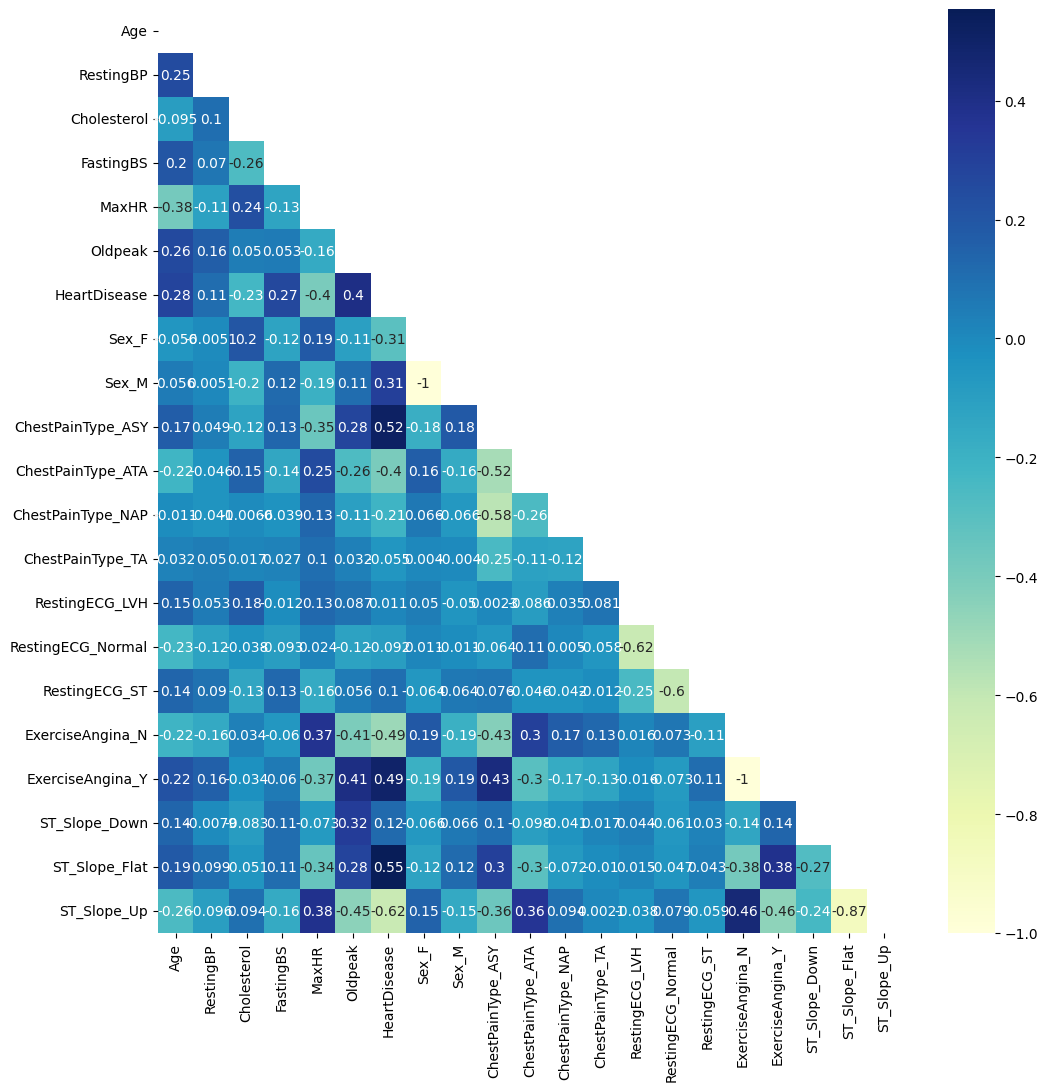

In [365]:
# Map the correlation of the new features
corrmat= df_dummies.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, annot=True, mask=mask, cmap='YlGnBu')

## Preparing & Building The Model

In [366]:
# Separating the features from the target classifications
X = df_dummies.drop(["HeartDisease"], axis=1)
y = np.array(df_dummies["HeartDisease"])
X = X.values

In [367]:
# Splitting the data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [368]:
# A fucntion that scales the data set and oversamples the data set to balance each classes
def scale_dataset(X_train, y_train, oversample=False):
    if oversample:
        ros = RandomOverSampler()
        X_train, y_train = ros.fit_resample(X_train, y_train)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    return X_train, y_train

In [369]:
# Preprocessing by scaling Standard Scaler
X_train, y_train = scale_dataset(X_train, y_train, oversample=True)
X_test, y_test = scale_dataset(X_test, y_test, oversample=False)

### k-Nearest Neighbor

The **k-nearest neighbors algorithm (KNN)** is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. It works by finding the k most similar training examples to a new data point and then using the majority label of those k examples to classify the new data point.

In [370]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [371]:
knn_pred = knn_model.predict(X_test)

ROC AUC: 0.9107565011820331
Confusion Matrix:
 [[80 10]
 [10 84]]
kNN Model Performance: 

                  precision    recall  f1-score   support

w/o HeartFailure       0.89      0.89      0.89        90
 w/ HeartFailure       0.89      0.89      0.89        94

        accuracy                           0.89       184
       macro avg       0.89      0.89      0.89       184
    weighted avg       0.89      0.89      0.89       184



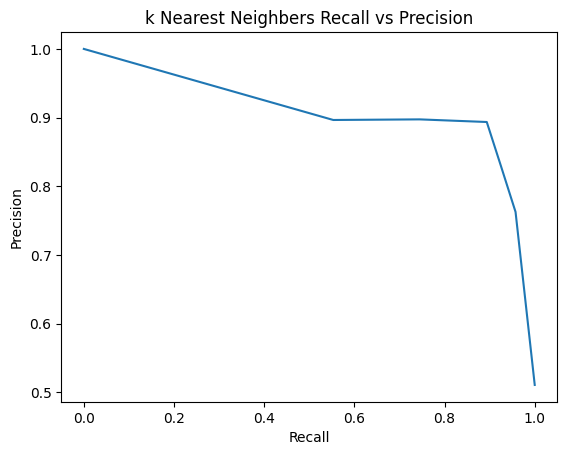

In [372]:
# Determine the are under the curve
tree_roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {tree_roc_auc}')
# Determine the confusion matrix of the model
tree_confusion_matrix = confusion_matrix(y_test, knn_pred)
print(f'Confusion Matrix:\n {tree_confusion_matrix}')
print('kNN Model Performance: \n')
print(classification_report(y_test, knn_pred, target_names=['w/o HeartFailure', 'w/ HeartFailure']))
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
plt.plot(knn_recall, knn_precision)
plt.title('k Nearest Neighbers Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


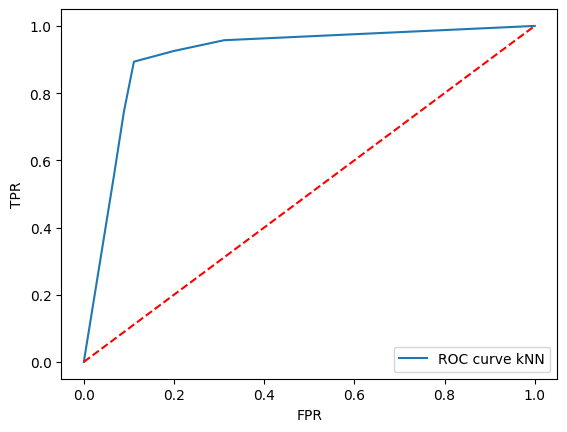

In [373]:
# Graph the True Positive rate against the False Positive Rate
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
plt.plot(knn_fpr, knn_tpr, label='ROC curve kNN')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [374]:
# Save model
# with open('../models/knn_model.pkl', 'wb') as f:
#     pickle.dump(knn_model, f)

### Decision Tree

A **decision tree classifier** is a supervised machine learning algorithm that can be used for both classification and regression tasks. It works by creating a tree-like structure where each node represents a decision rule and each leaf node represents an outcome. The tree is built by recursively splitting the data into smaller and smaller groups until each group is homogeneous with respect to the target variable.

In [375]:
# change random state to enable the model to create different trees after each training
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [376]:
tree_pred = tree_model.predict(X_test)

ROC AUC: 0.7653664302600472
Confusion Matrix:
 [[65 25]
 [18 76]]
Decision Tree Model Performance: 

                  precision    recall  f1-score   support

w/o HeartFailure       0.78      0.72      0.75        90
 w/ HeartFailure       0.75      0.81      0.78        94

        accuracy                           0.77       184
       macro avg       0.77      0.77      0.77       184
    weighted avg       0.77      0.77      0.77       184



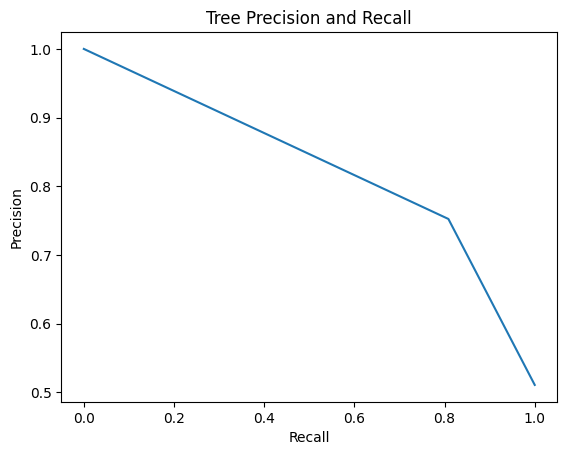

In [377]:
# Determine the are under the curve
tree_roc_auc = roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {tree_roc_auc}')
# determine the confusion matrix of the model
tree_confusion_matrix = confusion_matrix(y_test, tree_pred)
print(f'Confusion Matrix:\n {tree_confusion_matrix}')
print('Decision Tree Model Performance: \n')
print(classification_report(y_test, tree_pred, target_names=['w/o HeartFailure', 'w/ HeartFailure']))
tree_precision, tree_recall, tree_thresholds = precision_recall_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
plt.title('Tree Precision and Recall')
plt.plot(tree_recall, tree_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

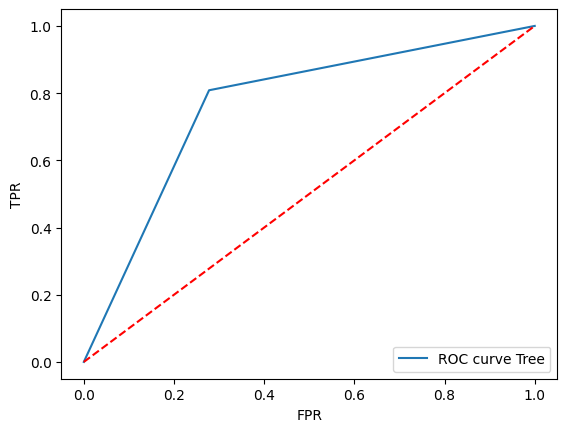

In [378]:
# Graph the True Positive rate against the False Positive Rate
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
plt.plot(tree_fpr, tree_tpr, label='ROC curve Tree')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [379]:
# Save model
# with open('../models/tree_model.pkl', 'wb') as f:
#     pickle.dump(knn_model, f)

### Naive Bayes

**Naive Bayes** is a supervised machine learning algorithm that is used for classification tasks. It is based on Bayes' theorem, which is a formula for calculating the probability of an event happening given the probability of other events that have already happened. Naive Bayes works by assuming that the features of a data point are independent of each other. This means that the value of one feature does not affect the value of another feature.

In [380]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [381]:
nb_pred = nb_model.predict(X_test)

ROC AUC: 0.8958628841607564
Confusion Matrix:
 [[76 14]
 [13 81]]
Decision Tree Model Performance: 

                  precision    recall  f1-score   support

w/o HeartFailure       0.85      0.84      0.85        90
 w/ HeartFailure       0.85      0.86      0.86        94

        accuracy                           0.85       184
       macro avg       0.85      0.85      0.85       184
    weighted avg       0.85      0.85      0.85       184



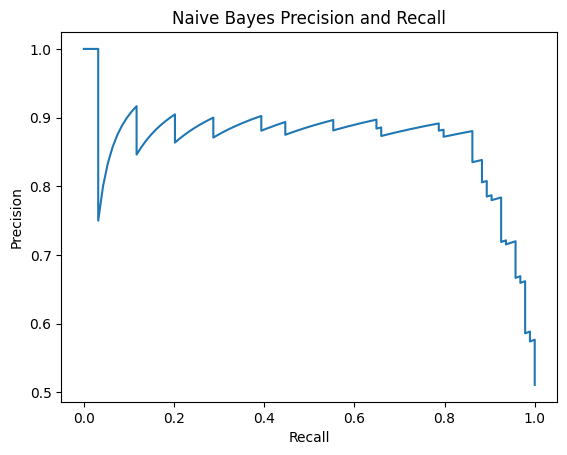

In [382]:
# Determine the are under the curve
nb_roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {nb_roc_auc}')
# determine the confusion matrix of the model
nb_confusion_matrix = confusion_matrix(y_test, nb_pred)
print(f'Confusion Matrix:\n {nb_confusion_matrix}')
print('Decision Tree Model Performance: \n')
print(classification_report(y_test, nb_pred, target_names=['w/o HeartFailure', 'w/ HeartFailure']))
nb_precision, nb_recall, nb_thresholds = precision_recall_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
plt.title('Naive Bayes Precision and Recall')
plt.plot(nb_recall, nb_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

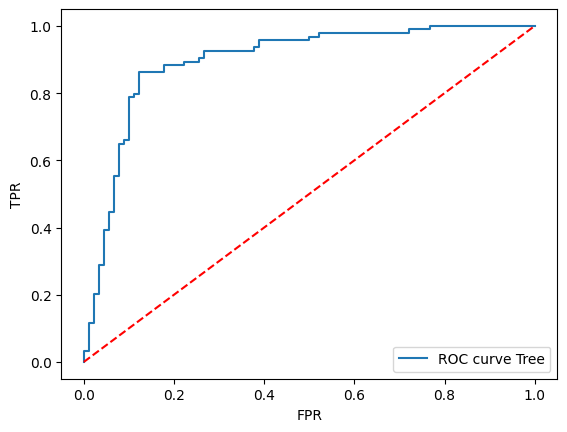

In [383]:
# Graph the True Positive rate against the False Positive Rate
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
plt.plot(nb_fpr, nb_tpr, label='ROC curve Tree')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [384]:
# Save model
# with open('../models/nb_model.pkl', 'wb') as f:
#     pickle.dump(knn_model, f)